In [3]:
# 📌 Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [7]:
# 📌 Cell 2: Load Dataset
df = pd.read_csv("/content/sample_data/shopping_behavior_updated.csv")

# Preview dataset
print(df.head())
print(df.info())
print(df.describe())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [8]:
# 📌 Cell 3: Data Cleaning & Preprocessing
# Check missing values
print(df.isnull().sum())

# Handle duplicates
df = df.drop_duplicates()

# Example: Convert categorical 'Age' into Age Groups if not present
if "Age" in df.columns and "Age_Group" not in df.columns:
    bins = [0, 18, 30, 45, 60, 100]
    labels = ["Teen", "Young Adult", "Adult", "Middle Age", "Senior"]
    df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

print(df.head())


Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Locati

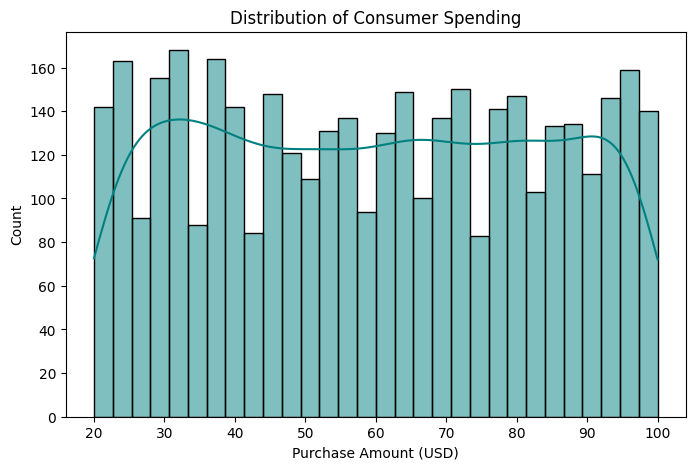

In [10]:
# 📌 Cell 4: Exploratory Data Analysis (EDA) - Spending Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True, color="teal")
plt.title("Distribution of Consumer Spending")
plt.show()

/tmp/ipython-input-3644463174.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Gender", y="Purchase Amount (USD)", data=df, estimator=np.mean, ci=None, palette="pastel")
/tmp/ipython-input-3644463174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Purchase Amount (USD)", data=df, estimator=np.mean, ci=None, palette="pastel")


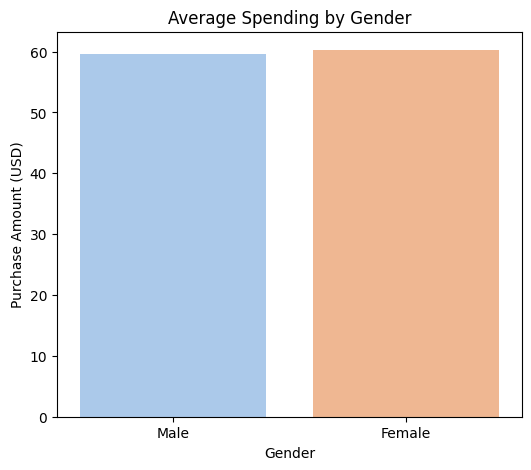

In [11]:
# 📌 Cell 5: Spending by Gender
plt.figure(figsize=(6,5))
sns.barplot(x="Gender", y="Purchase Amount (USD)", data=df, estimator=np.mean, ci=None, palette="pastel")
plt.title("Average Spending by Gender")
plt.show()

/tmp/ipython-input-2572849912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age_Group", y="Purchase Amount (USD)", data=df, palette="Set2")


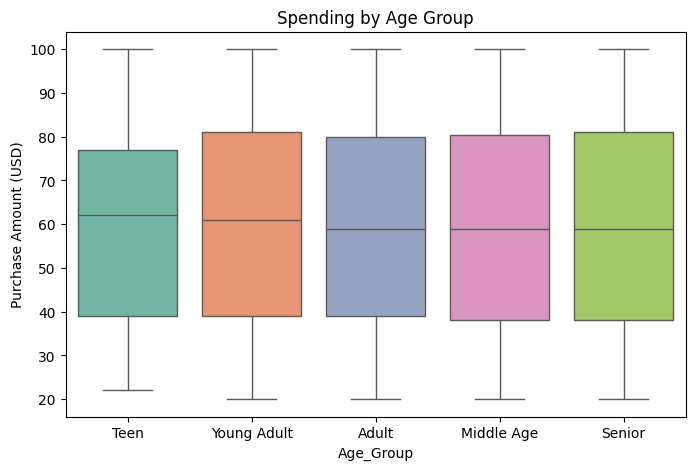

In [12]:
# 📌 Cell 6: Spending by Age Group
if "Age_Group" in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Age_Group", y="Spending", data=df, palette="Set2")
    plt.title("Spending by Age Group")
    plt.show()


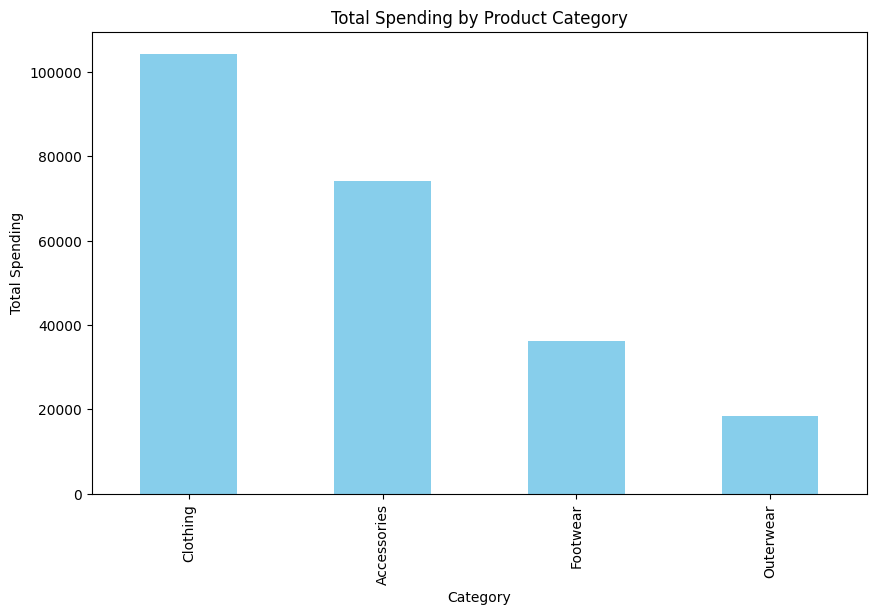

In [14]:
# 📌 Cell 7: Category Preferences
if "Category" in df.columns:
    plt.figure(figsize=(10,6))
    df.groupby("Category")["Purchase Amount (USD)"].sum().sort_values(ascending=False).plot(kind="bar", color="skyblue")
    plt.title("Total Spending by Product Category")
    plt.ylabel("Total Spending")
    plt.show()

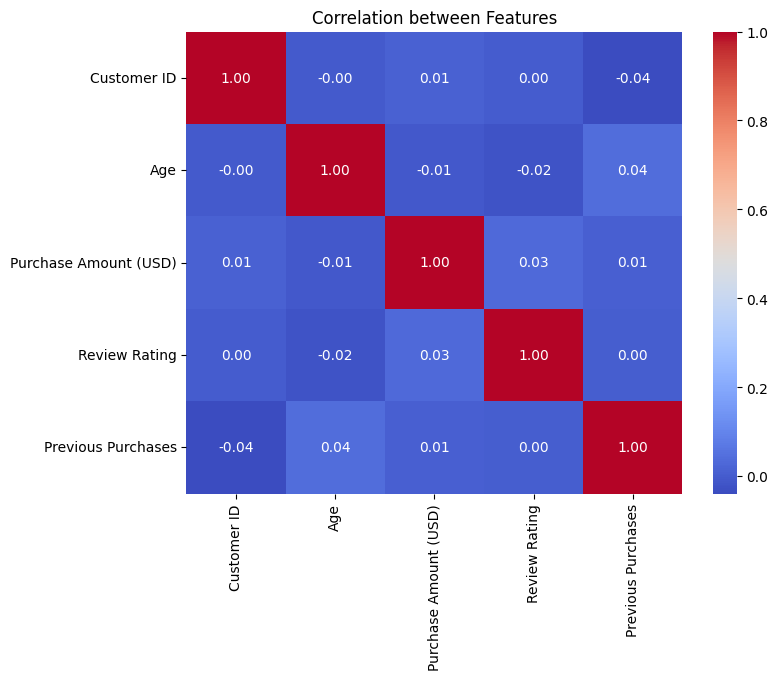

In [18]:
# 📌 Cell 8: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Features")
plt.show()


In [20]:
# 📌 Cell 9: Predictive Modeling (Linear Regression)
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop("Purchase Amount (USD)", axis=1)
y = df_encoded["Purchase Amount (USD)"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [21]:
# 📌 Cell 10: Model Evaluation
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 21.003574871548818
Root Mean Squared Error (RMSE): 24.096833659005814


In [17]:
# 📌 Cell 11: Business Insights & Recommendations

def business_insights(df):
    insights = []

    # Gender-based spending
    if "Gender" in df.columns:
        gender_spending = df.groupby("Gender")["Purchase Amount (USD)"].mean()
        top_gender = gender_spending.idxmax()
        insights.append(f"💡 {top_gender} customers spend the most on average.")

    # Age group-based spending
    if "Age_Group" in df.columns:
        age_spending = df.groupby("Age_Group")["Purchase Amount (USD)"].mean()
        top_age = age_spending.idxmax()
        insights.append(f"💡 The highest spending group is: {top_age}.")

    # Category preference
    if "Category" in df.columns:
        top_category = df.groupby("Category")["Purchase Amount (USD)"].sum().idxmax()
        insights.append(f"💡 Most money is spent on: {top_category} category.")

    # General trend
    if df["Purchase Amount (USD)"].mean() > 500:
        insights.append("💡 Customers tend to spend heavily, premium pricing strategies may work.")
    else:
        insights.append("💡 Customers are price-sensitive, discounts and offers may boost sales.")

    return insights

insights = business_insights(df)
print("📊 Business Insights & Recommendations:\n")
for point in insights:
    print(point)

📊 Business Insights & Recommendations:

💡 Female customers spend the most on average.
💡 The highest spending group is: Young Adult.
💡 Most money is spent on: Clothing category.
💡 Customers are price-sensitive, discounts and offers may boost sales.


/tmp/ipython-input-593774309.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = df.groupby("Age_Group")["Purchase Amount (USD)"].mean()
